# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets  
my_btc = 1.2
my_eth = 5.3  

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
# print(btc_data)
btc_cad = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
# print(btc_cad)

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
# print(eth_data)
eth_cad = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
# print(eth_cad)

# Compute current value of my crpto
my_btc_value = my_btc * btc_cad
my_eth_value = my_eth * eth_cad

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $55979.65
The current value of your 5.3 ETH is $17596.38


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [9]:
# Format current date as ISO format
start_date = pd.Timestamp("2018-01-28", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-28", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_tickers = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Preview DataFrame
df_tickers.head(10) 

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2018-02-09 00:00:00-05:00  106.78  107.0700  106.7000  106.76  5603974   
2018-02-12 00:00:00-05:00  106.74  106.9450  106.6632  106.77  5075086   
2018-02-13 00:00:00-05:00  106.79  106.9100  106.7000  106.83  3689890   
2018-02-14 00:00:00-05:00  106.57  106.6600  106.4039  106.46  3695997   
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428   
2018-02-16 00:00:00-05:00  106.85  106.8750  106.7100  106.81  3391074   
2018-02-20 00:00:00-05:00  106.69  106.7099  106.5501  106.68  2372055   
2018-02-21 00:00:00-05:00  106.77  106.8000  106.2601  106.30  3017853   
2018-02-22 00:00:00-05:00  106.49  106.5600  106.3600  106.36  2150355   
2018-02-23 00:00:00-05:00  106.61  106.7600  106.5650  106.69  2113324   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2018-02-09 00:00:00-05:00  260.80  263.61  252.92  261.67  207357854  
2018-02-12 00:00:00-05:00  263.87  267.01  261.88  265.26   99933794  
2018-02-13 00:00:00-05:00  263.94  266.62  263.31  266.01   56891150  
2018-02-14 00:00:00-05:00  264.47  270.00  263.97  269.71   86705860  
2018-02-15 00:00:00-05:00  271.59  273.01  268.77  273.00   72021939  
2018-02-16 00:00:00-05:00  272.31  275.32  272.27  273.09   76314679  
2018-02-20 00:00:00-05:00  272.03  273.67  264.84  271.43   54829423  
2018-02-21 00:00:00-05:00  271.90  274.72  269.98  270.00   67813909  
2018-02-22 00:00:00-05:00  271.09  273.05  269.64  270.32   65771832  
2018-02-23 00:00:00-05:00  271.81  274.70  271.25  274.69   54742759

In [10]:
# Pick AGG and SPY close prices
agg_close_price = df_tickers["AGG"]["close"][-1]
spy_close_price = df_tickers["SPY"]["close"][-1]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.81
Current SPY closing price: $441.92


In [11]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22096.00
The current value of your 200 AGG shares is $22362.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data=[my_spy_value + my_agg_value, my_btc_value + my_eth_value]
# print(savings_data)

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=["amount"], index=["shares", "crypto"])

# Display savings DataFrame
display(df_savings)

,amount
shares,44458.000000
crypto,73576.032453


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

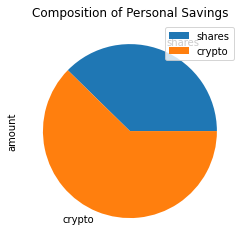

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [275]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
#print(emergency_fund)

# Calculate total amount of savings
total_savings = df_savings.sum()[0]
#print(total_savings)

# Validate saving health
if (total_savings > emergency_fund):
    print("congrats on your healthy savings")
elif (total_savings == emergency_funds):
    print("well done reaching this financial goal")
elif total_savings < emergency_fund:
    print(f"you are ${emergency_fund-total_savings} away from reaching your goal")

congrats on your healthy savings


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [46]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [47]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [48]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Luke\Desktop\Fintech\my_repos\APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011939,1.013497,1.007991,1.009521,0.998600,0.999268,1.000374,1.000444,0.989746,1.005817,...,0.999519,0.992198,0.995529,1.003418,0.997858,0.994258,1.000944,1.002282,0.993933,1.010623
2,1.014571,1.015644,1.003152,1.011157,0.999353,0.993739,0.994282,0.990539,0.976641,1.004410,...,0.998520,0.995976,0.988634,0.999283,0.988716,1.012787,0.997727,1.000254,1.006240,1.014940
3,1.015216,1.020848,1.005226,1.023617,1.010946,0.993436,0.986449,0.985802,0.978182,1.008925,...,0.977175,1.001829,0.977926,1.008204,0.996902,1.015023,1.022273,0.989973,1.006240,1.014341
4,1.020803,1.030810,1.008922,1.015189,1.005727,0.988266,0.980657,0.987728,0.982180,1.002880,...,0.984909,1.003135,0.965540,1.011610,0.997466,1.027638,1.017105,0.997958,1.006769,1.030598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.826542,31.354514,13.941307,18.744419,19.541326,17.542218,11.217347,9.536441,43.863462,8.592521,...,46.538945,35.877197,16.634957,13.152154,31.843274,22.204023,14.180718,12.606910,13.265603,39.807816
7557,7.788711,30.925930,13.853477,18.840446,19.331583,17.500279,11.252053,9.549337,43.925541,8.690422,...,46.346163,35.558949,16.558846,13.133707,31.761327,22.446159,14.135540,12.703749,13.149983,40.267526
7558,7.883064,30.764715,13.794086,18.630879,19.346037,17.518410,11.248802,9.521045,44.217041,8.782942,...,46.263381,35.367101,16.723919,13.196415,31.828471,22.487272,14.352217,12.778455,13.143901,40.122394
7559,7.882114,31.082689,13.951305,18.779243,19.337773,17.710394,11.203046,9.401087,44.013085,8.797215,...,46.337203,35.186726,16.773209,13.276865,31.704654,22.525165,14.424645,12.893662,13.225085,39.863463


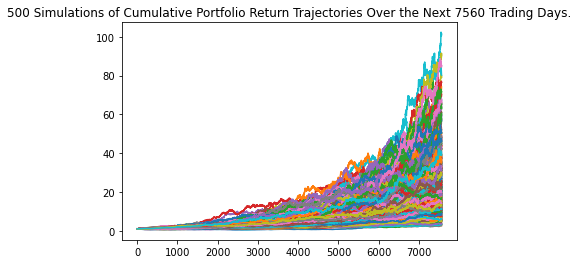

In [49]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

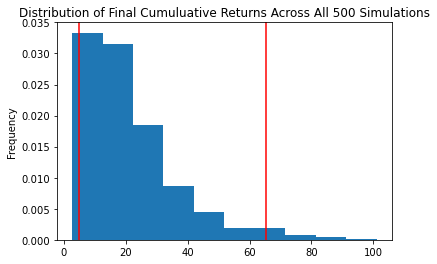

In [50]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             21.397030
std              15.279172
min               2.654907
25%              10.685789
50%              17.724086
75%              26.886906
max             101.044405
95% CI Lower      4.936676
95% CI Upper     65.370021
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [52]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $98733.51 and $1307400.43


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [53]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $148100.27 and $1961100.64


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [295]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [296]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Luke\Desktop\Fintech\my_repos\APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.978944,0.997580,1.004865,1.012103,1.009911,1.010019,0.994515,1.006034,1.019044,1.018295,...,1.003918,0.993097,0.992986,0.989580,1.005766,1.003729,1.001599,1.023653,1.014787,1.006231
2,0.965702,1.007123,0.995139,1.010115,1.019203,1.012105,0.983808,1.010321,1.023682,1.015958,...,1.025978,0.998581,0.989612,0.985019,0.981699,1.008127,1.013613,1.024296,1.012146,0.992616
3,0.953732,0.996748,0.997870,0.992639,1.017864,1.027612,0.975927,0.996809,1.018798,1.009751,...,1.014878,0.998916,0.979420,0.998286,0.976634,1.006279,1.003098,1.027755,0.986213,0.989029
4,0.949609,0.978763,1.007794,1.010295,1.005921,1.014849,0.979032,0.978699,1.031462,1.006216,...,1.011351,1.005189,0.968523,0.991049,0.967004,1.021236,1.005048,1.031776,0.982965,0.979047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.194664,3.081054,1.542387,2.151415,2.289827,2.585284,1.414506,1.249375,3.776751,1.382120,...,2.610295,2.463177,1.059026,2.381665,1.499232,2.320711,1.698710,2.560142,1.189412,1.690506
1257,1.215101,3.067303,1.560239,2.160652,2.273299,2.608438,1.411289,1.237744,3.702586,1.402119,...,2.619937,2.464615,1.048126,2.386497,1.525450,2.298840,1.673877,2.587692,1.167441,1.702092
1258,1.213293,3.043883,1.566780,2.156081,2.243819,2.616524,1.421741,1.242244,3.720164,1.383186,...,2.649952,2.453900,1.037490,2.360457,1.540196,2.297915,1.701334,2.618534,1.163544,1.685538
1259,1.199214,3.057539,1.579900,2.138477,2.265634,2.614578,1.421531,1.260817,3.753255,1.387627,...,2.647679,2.494473,1.031099,2.335914,1.545788,2.292150,1.695467,2.628589,1.150148,1.692048


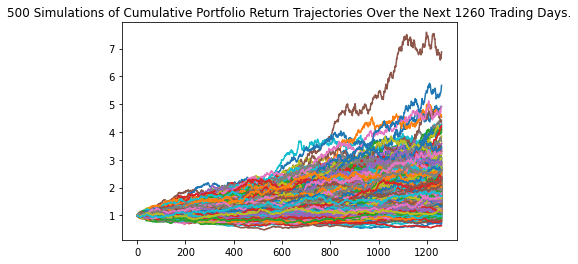

In [297]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

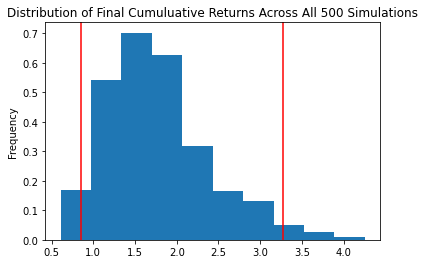

In [280]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [281]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              1.772946
std               0.623034
min               0.606751
25%               1.312649
50%               1.665259
75%               2.078772
max               4.254238
95% CI Lower      0.858173
95% CI Upper      3.272585
Name: 1260, dtype: float64


In [282]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl[8]*initial_investment,2)
ci_upper_five = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51490.38 and $196355.12


### Ten Years Retirement Option

In [289]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [290]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Luke\Desktop\Fintech\my_repos\APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991518,0.977979,1.002798,0.996615,0.994316,0.990022,1.000712,1.007471,0.989129,0.997659,...,0.992068,0.987848,1.015170,1.009523,1.001089,0.991787,1.018570,0.989025,0.990508,1.007355
2,0.995433,0.989572,0.992398,1.005280,0.999648,0.992434,0.995290,1.006155,0.984273,1.002236,...,1.012961,0.988195,1.013851,1.001881,0.987849,0.992644,1.040822,0.981732,1.004717,0.983146
3,1.005358,1.004386,0.987410,1.024524,0.999809,0.983500,1.010401,0.992926,1.010549,1.008140,...,1.008001,0.995709,1.008965,0.998631,0.988185,0.989409,1.026690,0.970509,1.001213,0.969122
4,1.003670,1.004902,0.987558,1.026645,1.012025,0.976988,1.016570,0.986014,1.014624,1.022478,...,1.004756,0.984904,1.011051,0.996106,0.984917,0.970646,1.034046,0.975746,1.007792,0.959855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.616346,1.806120,3.722144,2.309640,4.823091,3.283232,1.702659,3.452199,4.556599,5.641193,...,3.594096,2.074549,3.569728,4.278537,0.706478,2.469476,6.129750,1.723634,1.585853,3.849149
2517,2.615386,1.803327,3.672899,2.296390,4.915193,3.298914,1.705301,3.479283,4.577353,5.653010,...,3.517208,2.095871,3.632474,4.291748,0.694711,2.413353,6.111718,1.728936,1.603881,3.807154
2518,2.623615,1.808716,3.727300,2.262371,4.979941,3.309200,1.705696,3.437572,4.527281,5.685538,...,3.454429,2.107594,3.627049,4.225474,0.695651,2.438003,6.117686,1.736729,1.595079,3.839270
2519,2.602552,1.857658,3.661138,2.231038,4.962988,3.297778,1.701836,3.475218,4.527182,5.700833,...,3.419819,2.114437,3.553570,4.213104,0.701154,2.447912,6.176111,1.745482,1.589730,3.849569


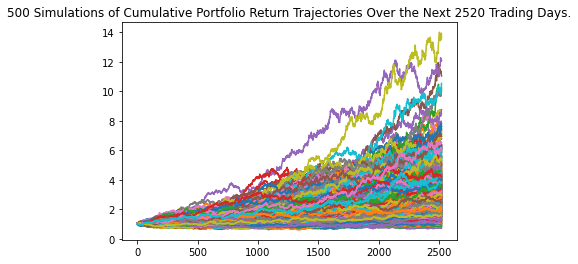

In [291]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

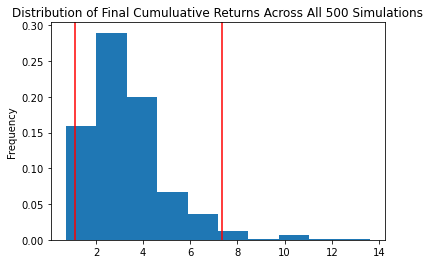

In [292]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [293]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              3.299505
std               1.690678
min               0.719071
25%               2.145308
50%               2.969258
75%               4.020322
max              13.626299
95% CI Lower      1.098899
95% CI Upper      7.338083
Name: 2520, dtype: float64


In [294]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl[8]*initial_investment,2)
ci_upper_ten = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $65933.92 and $440284.97
